In [72]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import confusion_matrix, classification_report, f1_score, recall_score,\
precision_score, roc_auc_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
import category_encoders as ce
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer


from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeRegressor, plot_tree

from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [34]:
sns.set_style("dark")

In [2]:
df = pd.read_csv('cancer_data.csv')

In [3]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [5]:
df.isna().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

Jenis kesalahan yang diprediksi dalam dataset: 
- Kita mau menekan false negative, prediksi-nya negative namun hasil-nya positif
- Kita menggunakkan recall untuk menekan fn

In [11]:
df.drop(columns='Unnamed: 32', inplace=True)

In [12]:
df.drop(columns='id', inplace=True)

### Cari model terbaik
- Model yang digunakkan:
    - Decision Tree
    - Logistic Regression
    - Random Forest
    - KNeighbors

In [13]:
df['target'] = np.where(df['diagnosis'] == 'M', 1, 0)

In [14]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,target
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,1
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,1
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,1
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,1
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,1


In [62]:
df['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

Jumlah kelas positif dan negatif-nya mirip, tidak kelihatan data imbalance.

### Train Test Split

In [30]:
features = ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 
       'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean',
       'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 
       'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 
       'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 
       'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst']

In [31]:
X = df[features]

In [17]:
y = df['target']

In [18]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    stratify=y,
    test_size=0.2,
    random_state=2020 # agar pembagian data konsisten
)

### Decision Tree 
### Model fitting and evaluation

In [48]:
tree = DecisionTreeClassifier(max_depth = 3)
tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [49]:
y_pred = tree.predict(X_test)
accuracy_score(y_test, y_pred)

0.9210526315789473

In [50]:
importance_table = pd.DataFrame({'imp': tree.feature_importances_
}, index = features)
importance_table

,imp
radius_mean,0.000000
texture_mean,0.000000
perimeter_mean,0.000000
area_mean,0.000000
smoothness_mean,0.000000
compactness_mean,0.017565
concavity_mean,0.000000
concave points_mean,0.800673
symmetry_mean,0.000000
fractal_dimension_mean,0.000000


<AxesSubplot:>

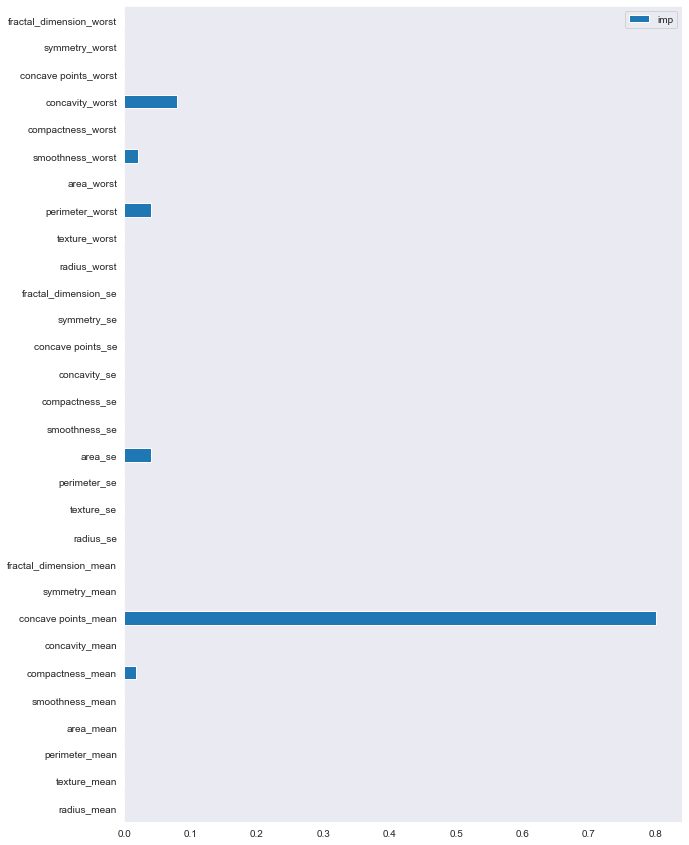

In [51]:
importance_table.plot(kind ='barh', figsize = (10,15))

[Text(558.0, 951.3000000000001, 'concave points_mean <= 0.051\ngini = 0.468\nsamples = 455\nvalue = [285, 170]\nclass = B'),
 Text(279.0, 679.5, 'area_se <= 38.415\ngini = 0.089\nsamples = 279\nvalue = [266, 13]\nclass = B'),
 Text(139.5, 407.70000000000005, 'perimeter_worst <= 117.45\ngini = 0.03\nsamples = 261\nvalue = [257, 4]\nclass = B'),
 Text(69.75, 135.89999999999998, 'gini = 0.023\nsamples = 260\nvalue = [257, 3]\nclass = B'),
 Text(209.25, 135.89999999999998, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]\nclass = M'),
 Text(418.5, 407.70000000000005, 'smoothness_worst <= 0.109\ngini = 0.5\nsamples = 18\nvalue = [9, 9]\nclass = B'),
 Text(348.75, 135.89999999999998, 'gini = 0.219\nsamples = 8\nvalue = [7, 1]\nclass = B'),
 Text(488.25, 135.89999999999998, 'gini = 0.32\nsamples = 10\nvalue = [2, 8]\nclass = M'),
 Text(837.0, 679.5, 'concavity_worst <= 0.223\ngini = 0.193\nsamples = 176\nvalue = [19, 157]\nclass = M'),
 Text(697.5, 407.70000000000005, 'compactness_mean <= 0.083\ngini

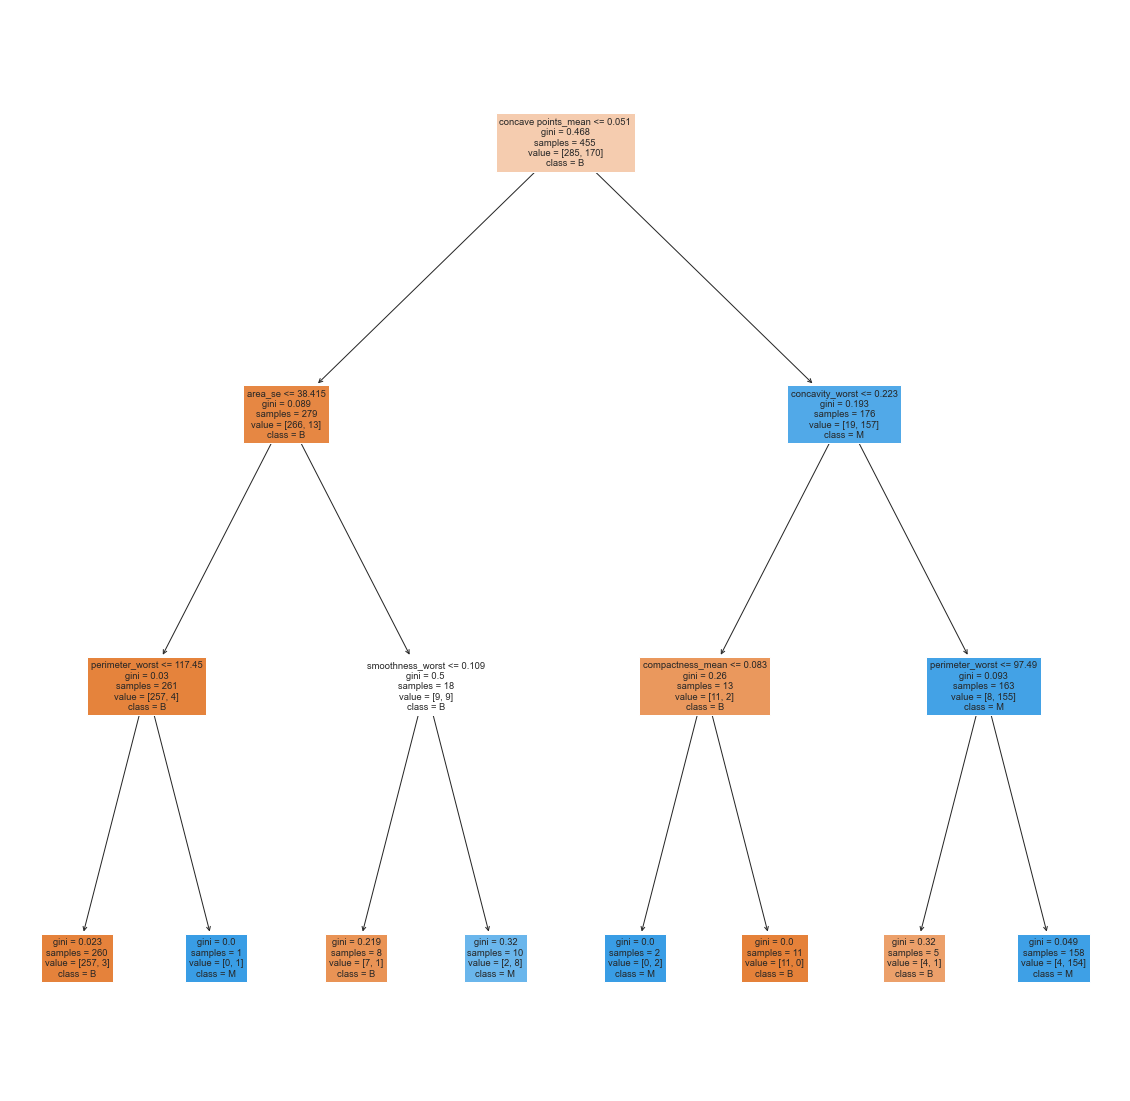

In [52]:
plt.figure(figsize=(20,20))
plot_tree(tree, feature_names = features, filled = True, class_names=['B','M'])

### Cari max depth terbaik dari decision tree

### KNN

In [20]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [21]:
y_predict = knn.predict(X_test)
y_predict

array([1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 0])

In [22]:
print('model accuracy score = {}'.format(accuracy_score(y_test, y_predict)))

model accuracy score = 0.9298245614035088


Accuracy 93%, artinya dari 10 kali prediksi, model kita memprediksi 9.3 kali benar.

### Scalling dengan knn

### Mencari best k dari knn

### Logistic Regression

In [39]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [40]:
y_pred = logreg.predict(X_test)
accuracy_score(y_test, y_pred)

0.9385964912280702

### Gunakkan polynomial

Model yang dipilih nanti-nya adalah model dengan akurasi recall tertinggi.

### Cross validation: Metric Accuracy

In [56]:
skfold = StratifiedKFold(n_splits=5)

logreg_cv = cross_val_score(logreg, X_train, y_train, cv=skfold)
tree_cv = cross_val_score(tree, X_train, y_train, cv=skfold)

knn_cv = cross_val_score(knn, X_train, y_train, cv=skfold)

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-le

In [57]:
print("CV logreg ", logreg_cv)
print("CV tree ", tree_cv)
print("CV knn ", knn_cv)

CV logreg  [0.93406593 0.9010989  0.94505495 0.94505495 0.97802198]
CV tree  [0.93406593 0.9010989  0.95604396 0.89010989 0.96703297]
CV knn  [0.9010989  0.92307692 0.94505495 0.91208791 0.95604396]


In [58]:
# pilih yang akurasi tinggi
print("CV logreg ", logreg_cv.mean())
print("CV tree ", tree_cv.mean())
print("CV knn ", knn_cv.mean())

CV logreg  0.9406593406593406
CV tree  0.9296703296703297
CV knn  0.9274725274725274


In [59]:
# pilih yang std rendah
print("CV logreg ", logreg_cv.std())
print("CV tree ", tree_cv.std())
print("CV knn ", knn_cv.std())

CV logreg  0.02467026848422377
CV tree  0.02997402570766124
CV knn  0.020381579110979573


Akurasi tertinggi adalah logreg dengan nilai 0.94. Logreg dipilih karena memiliki akurasi tertinggi dan standard deviasi antara ketiga-nya tidak begitu jauh.

Kita mau menekan FN, maka dari itu kita menggunakkan recall.

### Cross Validation: Metric recall

In [61]:
skfold = StratifiedKFold(n_splits=5)

logreg_cv = cross_val_score(logreg, X_train, y_train, cv=skfold, scoring='recall')
tree_cv = cross_val_score(tree, X_train, y_train, cv=skfold, scoring='recall')

knn_cv = cross_val_score(knn, X_train, y_train, cv=skfold, scoring='recall')

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-le

Kalau kelas positif-nya sedikit, waktu suruh prediksi kelas positif, hasil-nya jelek.

In [63]:
# pilih yang akurasi tinggi
print("CV logreg ", logreg_cv.mean())
print("CV tree ", tree_cv.mean())
print("CV knn ", knn_cv.mean())

CV logreg  0.9058823529411765
CV tree  0.9235294117647058
CV knn  0.8823529411764707


In [64]:
# pilih yang std rendah
print("CV logreg ", logreg_cv.std())
print("CV tree ", tree_cv.std())
print("CV knn ", knn_cv.std())

CV logreg  0.03429971702850177
CV tree  0.057635052771368905
CV knn  0.05261336417646565


Berdasarkan metric recall, model terbaik untuk dataset cancer adalah tree, diikuti dengan logistic regressi.

### Model performance in test set

In [65]:
tree = DecisionTreeClassifier(max_depth = 3)
tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [66]:
y_pred = tree.predict(X_test)
accuracy_score(y_test, y_pred)

0.9210526315789473

In [69]:
print('recall', recall_score(y_test, y_pred))

recall 0.8333333333333334


In [70]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.97      0.94        72
           1       0.95      0.83      0.89        42

    accuracy                           0.92       114
   macro avg       0.93      0.90      0.91       114
weighted avg       0.92      0.92      0.92       114



### Hyperparameter tuning
- Grid search
- Randomised search

### Grid search

In [78]:
hyperparam_space = {
    'max_depth' : [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'criterion' : ['gini', 'entropy'],
    'min_samples_split' : [2, 3],
    'min_samples_leaf' : [1, 2]
}

In [79]:
X_train_val, X_test, y_train_val, y_test = train_test_split(
    X, y, 
    stratify=y,
    test_size=0.25,
    random_state=2020
)

In [80]:
skfold = StratifiedKFold(n_splits=5)
tree = DecisionTreeClassifier(max_depth = 3)

grid_search = GridSearchCV(
    tree, # model
    param_grid=hyperparam_space, # hyperprameter
    cv=skfold, # cross validasi
    scoring='recall', # metric evaluasi
    n_jobs=-1 # computer use all cores
)

In [81]:
grid_search.fit(X_train_val, y_train_val)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=DecisionTreeClassifier(max_depth=3), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 3]},
             scoring='recall')

In [82]:
print('best score', grid_search.best_score_)
print('best param', grid_search.best_params_)

best score 0.9497983870967742
best param {'criterion': 'entropy', 'max_depth': 4, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [84]:
pd.DataFrame(grid_search.cv_results_).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.007988,0.001413,0.007485,0.002362,gini,1,1,2,"{'criterion': 'gini', 'max_depth': 1, 'min_sam...",0.93750,0.935484,0.9375,0.9375,0.78125,0.905847,0.062303,59
1,0.008267,0.000878,0.006287,0.001031,gini,1,1,3,"{'criterion': 'gini', 'max_depth': 1, 'min_sam...",0.93750,0.935484,0.9375,0.9375,0.78125,0.905847,0.062303,59
2,0.007246,0.000964,0.007118,0.001519,gini,1,2,2,"{'criterion': 'gini', 'max_depth': 1, 'min_sam...",0.93750,0.935484,0.9375,0.9375,0.78125,0.905847,0.062303,59
3,0.007770,0.001464,0.007214,0.001950,gini,1,2,3,"{'criterion': 'gini', 'max_depth': 1, 'min_sam...",0.93750,0.935484,0.9375,0.9375,0.78125,0.905847,0.062303,59
4,0.009379,0.001440,0.008234,0.002141,gini,2,1,2,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.90625,0.935484,0.9375,0.8750,0.90625,0.912097,0.022964,44


### Randomised Search

In [85]:
random = RandomizedSearchCV(
    tree, param_distributions=hyperparam_space,
    cv=skfold, n_jobs=-1, 
    scoring='recall'
)

In [86]:
random.fit(X_train_val, y_train_val)

RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
                   estimator=DecisionTreeClassifier(max_depth=3), n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                      10],
                                        'min_samples_leaf': [1, 2],
                                        'min_samples_split': [2, 3]},
                   scoring='recall')

In [87]:
print('best score', random.best_score_)
print('best param', random.best_params_)

best score 0.9433467741935484
best param {'min_samples_split': 3, 'min_samples_leaf': 1, 'max_depth': 4, 'criterion': 'entropy'}


Score untuk recall lebih tinggu mengunakkan grid search daripada randomised search. Maka dari itu, kita menggunakkan grid search.

In [89]:
grid_search.best_estimator_.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [96]:
y_pred = grid_search.best_estimator_.predict(X_test)

In [98]:
recall_score(y_test, y_pred)

0.8490566037735849

Recall score naik dari 0.83 menjadi 0.85, maka dari itu kita mengunakkan grid search.

### Bonus (In progress)

- Buatlah function untuk mengevaluasi beberapa model sekaligus menggunakkan cv dan metric evaluasi tertentu. Output dari fungsi tersebut berupa dataframe berisi nama model, rata-rata score dan std deviasi dari score.

In [112]:
# Flexible metrics and model

def model_evaluation_cv(model, metric):
    skfold = StratifiedKFold(n_splits=5)
    model_cv = cross_val_score(model, X_train_val, y_train_val, cv=skfold, scoring=metric)
    return model_cv

In [113]:
def print_result(model_cv):
    print('score: ', model_cv)
    print('std score: ', model_cv.std())

In [114]:
model = DecisionTreeClassifier(criterion='entropy', random_state=2020)

In [115]:
model_cv = model_evaluation_cv(model, metric)

In [116]:
metric = 'f1'

In [117]:
print_result(model_cv)

score:  [0.89855072 0.95081967 0.96774194 0.92307692 0.89552239]
std score:  0.028435093299632456
